### Starting with sewar

In [27]:
import cv2

image1 = cv2.imread(r"E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg001\labels\Frames\2023-07-18_154344_VID003_0.0.png")
image2 = cv2.imread(r"E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg001\labels\Frames\2023-07-18_154344_VID003_1.456.png")

#### Some of the common and basic built-in similarity metrics in sewar

In [30]:
from sewar.full_ref import mse, rmse, uqi, ergas
print('Ergas: ', ergas(image1,image2))
print('MSE: ', mse(image1,image2))
print('RMSE: ', rmse(image1,image2))

Ergas:  22.289647908575247
MSE:  158.03167229295266
RMSE:  12.571064883014193


In [38]:
import os
import cv2
import shutil
from sewar.full_ref import uqi
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to calculate UQI between two images
def calculate_uqi(image1_path, image2_path):
    # Read images
    image1 = cv2.imread(image1_path)
    image2 = cv2.imread(image2_path)

    # Resize images to same dimensions
    image1 = cv2.resize(image1, (image2.shape[1], image2.shape[0]))

    # Calculate UQI
    uqi_score = uqi(image1, image2)
    return uqi_score

# Input directory
input_folder = r"E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames"

# List image files
image_files = os.listdir(input_folder)

# Convert images to feature vectors (e.g., by resizing to a common size and flattening)
feature_vectors = []
for image_file in image_files:
    image_path = os.path.join(input_folder, image_file)
    if image_path.endswith('.png'):
        image = cv2.imread(image_path)
#         resized_image = cv2.resize(image, (520, 520))  # Resize to a common size
        feature_vector = image.flatten()  # Flatten the image
        feature_vectors.append(feature_vector)

# Calculate the Within-Cluster Sum of Squares (WCSS) for different values of k
wcss = []
max_clusters = 20  # Maximum number of clusters to consider
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(feature_vectors)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

MemoryError: Unable to allocate 24.1 GiB for an array with shape (520, 6220800) and data type float64

In [132]:
import os
import cv2
import shutil
from sewar.full_ref import uqi

# Function to calculate MSE between two images
def calculate_uqi(image1, image2):
    # Calculate MSE
    uqi_score = uqi(image1, image2)
    return uqi_score

# Input and output directories
input_folder = r"E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames"
output_folder = r"E:\SPS\Frame_Extraction_Project\disimilar"

# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# List image files
image_files = sorted([f for f in os.listdir(input_folder) if f.endswith('.png')])

x = 380  # Convert to integer as pixel coordinates must be integers
y = 0
w = 1150
h = 1920

# Iterate over each image
for i, image_file1 in enumerate(image_files):
    is_dissimilar = True  # Flag to track if image is dissimilar to all other images
    image_path1 = os.path.join(input_folder, image_file1)
    
    print(image_path1)
    
    image1 = cv2.imread(image_path1)
    
    cropped_image1 = image1[y:y+h, x:x+w]

    # Compare with all other images
    for j, image_file2 in enumerate(image_files):
        if j == i:  # Skip self-comparison
            continue
        image_path2 = os.path.join(input_folder, image_file2)
        print(image_path2)
        
        image2 = cv2.imread(image_path2)
        
        cropped_image2 = image2[y:y+h, x:x+w]
        
        # Calculate MSE between images
        similarity_score = calculate_uqi(cropped_image1, cropped_image2)
        print(similarity_score)

        # If similarity score is above threshold, set flag to False and break
        if similarity_score <= 0.8:
            is_dissimilar = False
            break

    # If image is dissimilar to any other image, copy it to output folder
    if is_dissimilar:
        print(f"Dissimilar image found: {image_file1}")
        shutil.copy(image_path1, os.path.join(output_folder, image_file1))

E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_1.456.png
0.8340815733185137
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_100.16.png
0.6141706612747306
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_1.456.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.8340815733185137
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_100.16.png
0.6415342649211372
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_100.16.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.6141706612747306
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_

0.5054347091685415
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_134.6.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.5008602392042315
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_135.352.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.5273378244213256
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_136.056.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.5009959522312152
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_138.032.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.5044056427680704
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003

0.5293087456367928
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_174.152.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.499356266882903
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_175.64.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.5357020521197084
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_176.432.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.47744832730333214
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_177.976.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.4705863305254445
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID00

0.5427040725439026
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_218.312.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.5729372247271863
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_219.056.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.6078169937215737
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_22.392.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.4930579859854001
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_220.552.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.6310005698899618
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID00

0.5791805452999809
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_259.264.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.5737590819708128
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_26.792.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.5658727434040709
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_260.184.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.551023461581278
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_261.112.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.5157949651161529
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003

0.6384653217791505
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_302.808.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.6404528870047339
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_304.04.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.6089384884675836
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_305.8.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.6318819069864741
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_307.8.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.6233004895016548
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_30

0.6618250876197993
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_352.712.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.6684045562536068
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_354.408.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.6602477957258982
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_355.952.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.6529075650831496
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_357.952.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.6597163262310709
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID0

0.43986024398012386
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_401.52.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.6428828982492135
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_402.264.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.6493213783338394
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_403.016.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.6491583420442697
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_404.512.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.6547873442781963
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID0

0.624015128003217
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_442.408.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.5884161008193768
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_444.144.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.5802432375856577
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_445.64.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.5877461504324374
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_447.136.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.6087134160190288
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003

0.5153773532206448
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_480.04.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.6091982388343747
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_481.096.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.6417782799113316
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_483.376.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.664545142437772
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_485.048.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.6597566507766377
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003

0.617556135436029
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_523.32.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.6458009568275046
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_524.688.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.5865013384986916
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_525.296.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.4873713759786495
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_526.44.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.6314651286125551
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_

0.6431677793651344
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_562.296.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.6881921950704907
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_563.04.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.6059447532218204
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_564.184.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.5825158000362601
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_565.288.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.7478355560661555
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID00

0.620219843373863
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_60.312.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.6138932588618222
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_600.432.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.650634181203879
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_601.928.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.6870671611653654
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_603.424.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.6473244534597425
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_

0.4370996744889846
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_638.216.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.5166891025902328
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_639.096.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.5717763130380187
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_64.264.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.5609616523431186
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_640.808.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.6136803064109487
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID00

0.6236908154889713
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_96.336.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.5783339292030356
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_97.168.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.5056544099260031
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_98.664.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.5317352384944912
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_99.192.png
E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png
0.6206878424962711


In [130]:
from sewar.full_ref import uqi

image1_path = r"E:\SPS\Frame_Extraction_Project\disimilar\img.jpg"
image2_path = r"E:\SPS\Frame_Extraction_Project\disimilar\img2.jpg"

image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

# image2_resized = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

# Flatten the images into 1D arrays
image1_flat = image1.flatten().reshape(1, -1)
image2_flat = image2.flatten().reshape(1, -1)

# Calculate cosine similarity
uqi(image1, image2)

0.49951374965048984

TypeError: Figure.savefig() takes 2 positional arguments but 3 were given

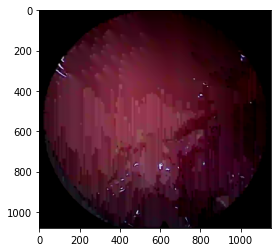

In [122]:
import cv2
import matplotlib.pyplot as plt

path = r"E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png"
# Read the image
image = cv2.imread(path)

# Calculate the bounding box coordinates (x, y, w, h)
x = 380  # Convert to integer as pixel coordinates must be integers
# y = 0
w = 1150
h = 1920

# Crop the image to extract the region of interest
cropped_image = image[y:y+h, x:x+w]

colored_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)

plt.imshow(colored_image)

output = 'r"E:\SPS\Frame_Extraction_Project\disimilar\img.jpg'
plt.savefig(colored_image, output)

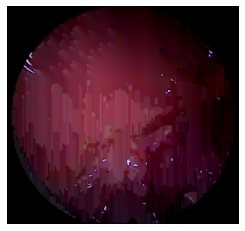

In [127]:
import cv2
import matplotlib.pyplot as plt

path = r"E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_126.288.png"
# Read the image
image = cv2.imread(path)

# Calculate the bounding box coordinates (x, y, w, h)
x = 380  # Convert to integer as pixel coordinates must be integers
y = 0
w = 1150
h = 1920

# Crop the image to extract the region of interest
cropped_image = image[y:y+h, x:x+w]

# Convert BGR image to RGB
# colored_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)

# Save the colored image using OpenCV
output_path = r"E:\SPS\Frame_Extraction_Project\disimilar\img2.jpg"
cv2.imwrite(output_path, cropped_image)

# Display the colored image using matplotlib (optional)
plt.imshow(colored_image)
plt.axis('off')
plt.show()

In [6]:
import cv2
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error

# Function to calculate Structural Similarity Index (SSIM)
def calculate_ssim(img1, img2):
    # Convert images to grayscale if they are in color
    if len(img1.shape) > 2:
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    if len(img2.shape) > 2:
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    
    # Calculate SSIM
    ssim_score = ssim(img1, img2)
    return ssim_score

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(img1, img2):
    # Convert images to grayscale if they are in color
    if len(img1.shape) > 2:
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    if len(img2.shape) > 2:
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    
    # Calculate MSE
    mse_score = mean_squared_error(img1.flatten(), img2.flatten())
    return mse_score

# Example usage:
img1 = cv2.imread(r"E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg003\labels\Frames\2023-07-18_154344_VID003_0.0.png")
img2 = cv2.imread(r"E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg001\labels\Frames\2023-07-18_154344_VID003_1.456.png")
ssim_score = calculate_ssim(img1, img2)
mse_score = calculate_mse(img1, img2)
print("SSIM:", ssim_score)
print("MSE:", mse_score)

SSIM: 0.9062682733468032
MSE: 27.17592930169753


In [15]:
from skimage.metrics import structural_similarity
import cv2

#Works well with images of different dimensions
def orb_sim(img1, img2):
    # SIFT is no longer available in cv2 so using ORB
    orb = cv2.ORB_create()

    # detect keypoints and descriptors
    kp_a, desc_a = orb.detectAndCompute(img1, None)
    kp_b, desc_b = orb.detectAndCompute(img2, None)

    # define the bruteforce matcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    #perform matches. 
    matches = bf.match(desc_a, desc_b)
    print(matches)
    #Look for similar regions with distance < 50. Goes from 0 to 100 so pick a number between.
    similar_regions = [i for i in matches if i.distance < 60]  
    if len(matches) == 0:
        return 0
    return len(similar_regions) / len(matches)


#Needs images to be same dimensions
# def structural_sim(img1, img2):

#     sim, diff = structural_similarity(img1, img2, full=True)
#     return sim

# img00 = cv2.imread('images/monkey_distorted.jpg', 0)
# img01 = cv2.imread('images/monkey_rotated.jpg', 0)

# img1 = cv2.imread('images/BSE.jpg', 0)  # 714 x 901 pixels
# img2 = cv2.imread('images/BSE_noisy.jpg', 0)  # 714 x 901 pixels
# img3 = cv2.imread('images/BSE_smoothed.jpg', 0)  # 203 x 256 pixels
# img4 = cv2.imread('images/different_img.jpg', 0)  # 203 x 256 pixels

orb_similarity = orb_sim(img1, img2)  #1.0 means identical. Lower = not similar

print("Similarity using ORB is: ", orb_similarity)
#Resize for SSIM
# from skimage.transform import resize
# img5 = resize(img3, (img1.shape[0], img1.shape[1]), anti_aliasing=True, preserve_range=True)

# ssim = structural_sim(img1, img2) #1.0 means identical. Lower = not similar
# print("Similarity using SSIM is: ", ssim)

(< cv2.DMatch 000001F9AA222430>, < cv2.DMatch 000001F9AA222870>, < cv2.DMatch 000001F9AA2224B0>, < cv2.DMatch 000001F9AA222F10>, < cv2.DMatch 000001F9AA222470>, < cv2.DMatch 000001F9AA222390>, < cv2.DMatch 000001F9AA2228F0>, < cv2.DMatch 000001F9AA222790>, < cv2.DMatch 000001F9AA2223B0>, < cv2.DMatch 000001F9AA222850>, < cv2.DMatch 000001F9AA2223F0>, < cv2.DMatch 000001F9AA2226D0>, < cv2.DMatch 000001F9AA222070>, < cv2.DMatch 000001F9AA222450>, < cv2.DMatch 000001F9AA222710>, < cv2.DMatch 000001F9AA222910>, < cv2.DMatch 000001F9AA222570>, < cv2.DMatch 000001F9AA223050>, < cv2.DMatch 000001F9AA222550>, < cv2.DMatch 000001F9AA222590>, < cv2.DMatch 000001F9AA2227F0>, < cv2.DMatch 000001F9AA222510>, < cv2.DMatch 000001F9AA222490>, < cv2.DMatch 000001F9AA2227B0>, < cv2.DMatch 000001F9AA222770>, < cv2.DMatch 000001F9AA2224D0>, < cv2.DMatch 000001F9AA2223D0>, < cv2.DMatch 000001F9AA222330>, < cv2.DMatch 000001F9AA2226B0>, < cv2.DMatch 000001F9AA222690>, < cv2.DMatch 000001F9AA222630>, < cv2.D

In [13]:
from skimage.metrics import structural_similarity
import cv2
from skimage.transform import resize

# Function to calculate ORB similarity
def orb_sim(img1, img2):
    orb = cv2.ORB_create()

    # detect keypoints and descriptors
    kp_a, desc_a = orb.detectAndCompute(img1, None)
    kp_b, desc_b = orb.detectAndCompute(img2, None)

    # define the brute-force matcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # perform matches
    matches = bf.match(desc_a, desc_b)
    
    # Look for similar regions with distance < 50. Goes from 0 to 100 so pick a number between.
    similar_regions = [i for i in matches if i.distance < 50]  
    if len(matches) == 0:
        return 0
    return len(similar_regions) / len(matches)

# Function to calculate structural similarity (SSIM)
def structural_sim(img1, img2):
    # Convert images to grayscale if they are not already
    if len(img1.shape) > 2:
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    if len(img2.shape) > 2:
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Resize images to a common size
    min_height = min(img1.shape[0], img2.shape[0])
    min_width = min(img1.shape[1], img2.shape[1])
    img1_resized = resize(img1, (min_height, min_width), anti_aliasing=True)
    img2_resized = resize(img2, (min_height, min_width), anti_aliasing=True)

    # Calculate SSIM
    sim, _ = structural_similarity(img1_resized, img2_resized, full=True)
    return sim

# Load images
img1 = cv2.imread(r"E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg001\labels\Frames\2023-07-18_154344_VID003_0.0.png", cv2.IMREAD_COLOR)  # Load image
img2 = cv2.imread(r"E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg001\labels\Frames\2023-07-18_154344_VID003_1.456.png", cv2.IMREAD_COLOR)  # Load image

# Calculate similarities
orb_similarity = orb_sim(img1, img2)
print("Similarity using ORB is:", orb_similarity)

# ssim_similarity = structural_sim(img1, img2)
# print("Similarity using SSIM is:", ssim_similarity)

Similarity using ORB is: 0.10317460317460317


In [21]:
def orb_sim(img1, img2):
    orb = cv2.ORB_create()

    # Detect keypoints and descriptors
    kp_a, desc_a = orb.detectAndCompute(img1, None)
    kp_b, desc_b = orb.detectAndCompute(img2, None)

    # Define the brute-force matcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Perform matches
    matches = bf.match(desc_a, desc_b)

    # Calculate similarity ratio
    similarity_ratio = len(matches) / min(len(kp_a), len(kp_b))
    print(similarity_ratio)

    # Retain images if similarity ratio is less than 0.4 (40% dissimilar or more)
    if similarity_ratio < 0.5:
        return True  # Images are dissimilar, retain them
    else:
        return False  # Images are similar, discard them

# Example usage
img1 = cv2.imread(r"E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg001\labels\Frames\2023-07-18_154344_VID003_9.68.png", 0)  # Load image as grayscale
img2 = cv2.imread(r"E:\SPS\Frame_Extraction_Project\Demo3\Videos\Surg001\labels\Frames\2023-07-18_154344_VID003_19.4.png", 0)  # Load image as grayscale

if orb_sim(img1, img2):
    print("Images are dissimilar retain them.")
else:
    print("Images are similar discard them.")

0.234
Images are dissimilar (50% or more dissimilar), retain them.


### Image similarity using ORB on multiple images at a time

In [4]:
import cv2
import os
import shutil

def compare_images(img1_path, img2_path):
    img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)
    
    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Find the keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    # Initialize BFMatcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(des1, des2)

    # Calculate similarity ratio
    similarity = len(matches) / len(kp1)

    return similarity

def save_dissimilar_images(original_dir, target_dir, threshold):
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    for filename1 in os.listdir(original_dir):
        for filename2 in os.listdir(original_dir):
            if filename1 != filename2:
                img1_path = os.path.join(original_dir, filename1)
                img2_path = os.path.join(original_dir, filename2)
                
                similarity = compare_images(img1_path, img2_path)
                
                if similarity <= threshold:
                    shutil.copy(img1_path, os.path.join(target_dir, filename1))
                    shutil.copy(img2_path, os.path.join(target_dir, filename2))

original_dir =r"E:\SPS\Frame_Extraction_Project\Demo9\Videos\Surg003\labels\Frames"
target_dir = r"E:\SPS\Frame_Extraction_Project\disimilar"
threshold = 0.3

save_dissimilar_images(original_dir, target_dir, threshold)

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\batch_distance.cpp:275: error: (-215:Assertion failed) type == src2.type() && src1.cols == src2.cols && (type == CV_32F || type == CV_8U) in function 'cv::batchDistance'


In [6]:
import cv2
import os
import shutil

def compare_images(img1_path, img2_path):
    img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)
    
    if img1 is None or img2 is None:
        print(f"Error: Unable to load one or both images: {img1_path}, {img2_path}")
        return -1
    
    if img1.shape != img2.shape:
        print("Error: Image dimensions do not match.")
        return -1
    
    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Find the keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)
    
    if des1 is None or des2 is None:
        print("Error: ORB feature extraction failed for one or both images.")
        return -1

    # Initialize BFMatcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(des1, des2)

    # Calculate similarity ratio
    similarity = len(matches) / len(kp1)

    return similarity

def save_dissimilar_images(original_dir, target_dir, threshold):
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    filenames = os.listdir(original_dir)
    num_files = len(filenames)

    for i in range(num_files):
        img1_path = os.path.join(original_dir, filenames[i])
        dissimilar = True
        
        for j in range(i + 1, num_files):
            img2_path = os.path.join(original_dir, filenames[j])
            similarity = compare_images(img1_path, img2_path)
            
            if similarity > threshold:
                dissimilar = False
                break
        
        if dissimilar:
            shutil.copy(img1_path, os.path.join(target_dir, filenames[i]))

original_dir = r"E:\SPS\Frame_Extraction_Project\Demo9\Videos\Surg003\labels\Frames"
target_dir = r"E:\SPS\Frame_Extraction_Project\disimilar"
threshold = 0.3

save_dissimilar_images(original_dir, target_dir, threshold)

Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extra

Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extra

Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extra

In [ ]:
import cv2
import os
import shutil

def compare_images(img1_path, img2_path, min_matching_points):
    img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)
    
    if img1 is None or img2 is None:
        print(f"Error: Unable to load one or both images: {img1_path}, {img2_path}")
        return -1
    
    if img1.shape != img2.shape:
        print("Error: Image dimensions do not match.")
        return -1
    
    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Find the keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)
    
    if des1 is None or des2 is None:
        print("Error: ORB feature extraction failed for one or both images.")
        return -1

    # Initialize BFMatcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(des1, des2)

    # Filter matches based on distance
    close_matches = [m for m in matches if m.distance < min_matching_points]

    # Calculate similarity ratio
    similarity = len(close_matches) / len(kp1)

    return similarity

def save_dissimilar_images(original_dir, target_dir, threshold, min_matching_points):
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    filenames = os.listdir(original_dir)
    num_files = len(filenames)

    for i in range(num_files):
        img1_path = os.path.join(original_dir, filenames[i])
        dissimilar = True
        
        for j in range(i + 1, num_files):
            img2_path = os.path.join(original_dir, filenames[j])
            similarity = compare_images(img1_path, img2_path, min_matching_points)
            
            if similarity > threshold:
                dissimilar = False
                break
        
        if dissimilar:
            shutil.copy(img1_path, os.path.join(target_dir, filenames[i]))

original_dir = r"E:\SPS\Frame_Extraction_Project\Demo9\Videos\Surg003\labels\Frames"
target_dir = r"E:\SPS\Frame_Extraction_Project\disimilar1"
threshold = 0.4
min_matching_points = 40  # Adjust this value based on your requirements

save_dissimilar_images(original_dir, target_dir, threshold, min_matching_points)

Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extraction failed for one or both images.
Error: ORB feature extra